<a href="https://colab.research.google.com/github/ispineda/Courses/blob/main/Machine-Learning/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cnx =sqlite3.connect('/content/drive/MyDrive/Datasets/database.sqlite')

In [9]:
df = pd.read_sql_query('SELECT * FROM Player_Attributes', cnx)

In [14]:
df.head()
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [12]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [15]:
features = [
       'potential',
       'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [16]:
target = ['overall_rating']

In [17]:
df =df.dropna()

In [18]:
x = df[features]
y = df[target]

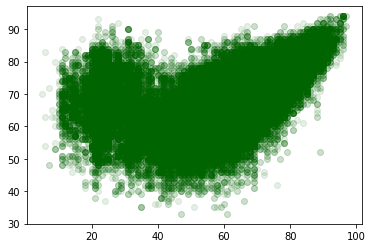

In [25]:
# Ejemplo de scatter plot
plt.scatter(x['reactions'], y, color='darkgreen', label='Data', alpha=.1)

Separación de datos de training y test datasets

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [28]:
# Para evitar sesgar las muestras se recomienda escalar las maginitudes, esto a fin de homogenizar las escalas
scale = preprocessing.StandardScaler() # Crea objeto
scale.fit(x_train)  #Encaja valores en scale
x_train = scale.transform(x_train) # Transforma valores y reasigna

In [29]:
x_train.max() # Corrobora la transformación

4.9683467491419835

In [31]:
regressor = LinearRegression() # Crea objeto para la regresión lineal

In [33]:
regressor.fit(x_train, y_train) # Crea el modelo de datos

LinearRegression()

In [34]:
# Para corroborar las predicciones se tiene...
x_test = scale.transform(x_test) # Transformación del escalamiento
y_prediction = regressor.predict(x_test) # Retorna los valores de la predicción
y_result = y_prediction - y_test # Evalua el error sobre la muestra
y_prediction.shape

(59517, 1)

In [35]:
# Calcula la raiz cuadrada del error cuadratico medio
RMSE = sqrt(mean_squared_error(y_true= y_test, y_pred= y_prediction))
regressor.score(x_test, y_test)

0.8412690897596595

In [36]:
print(RMSE)

2.80530304685521


In [37]:
regressor.coef_ # Muestra los coeficientes de W para el modelo polinomial

array([[ 2.48175418,  0.37435166,  0.2155902 ,  1.14537904,  0.72579619,
         0.08835762, -0.2396529 ,  0.20341906,  0.23070925,  0.08573083,
         2.03147644,  0.08063536,  0.11593773, -0.09744622,  1.92780373,
         0.10753058,  0.27833167,  0.16277628, -0.08089224,  0.73874625,
        -0.25048481,  0.33897633,  0.22293067, -0.18511046, -0.01892236,
         0.21517621,  0.70526674,  0.07880386, -0.61339243,  2.72376613,
         0.51832172, -0.70907673,  0.91420565,  0.43578429]])